In [13]:
import cv2
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Link for the dataset  https://www.kaggle.com/niharika41298/yoga-poses-dataset

In [14]:
import cv2
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import io


def load_image(path_or_array):
    if isinstance(path_or_array, str):  # If path provided, load image from path
        try:
            img = Image.open(path_or_array)
            img_array = np.array(img) / 255.0  # Convert image to NumPy array and rescale values
            return img_array
        except OSError as e:
            print(f"Skipping {path_or_array} due to OSError: {e}")
            return None  # Return None for problematic images
    elif isinstance(path_or_array, np.ndarray):  # If NumPy array provided, return it
        return path_or_array
    else:
        print("Invalid input type. Please provide either a path or a NumPy array.")
        return None



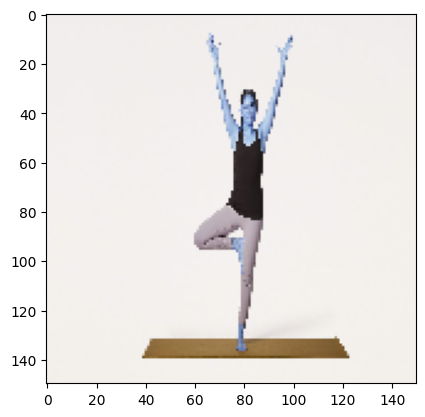

In [15]:
image = cv2.imread('DATASET/TEST/tree/00000003.jpg')

image = cv2.resize(image,(150,150))

image = np.array(image)

plt.imshow(image)

In [16]:
# source directory for training images
train_dir = 'DATASET/TRAIN'

# source directory for validation images
validation_dir  = 'DATASET/TEST'

train_datagen = ImageDataGenerator(
    preprocessing_function=load_image,
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        class_mode='categorical')


validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150), # All images will be resized to 150x150
        batch_size=20,
        class_mode='categorical')


Found 1081 images belonging to 5 classes.
Found 470 images belonging to 5 classes.


In [17]:
## Creating the model 
inputs = tf.keras.layers.Input(shape = (150,150,3,))
b1 = tf.keras.layers.Conv2D(filters = 64 , kernel_size = (3,3),padding = 'same',activation = 'relu')(inputs)
b1 = tf.keras.layers.Conv2D(filters = 64 , kernel_size = (3,3),padding = 'same',activation = 'relu')(b1)
b1 = tf.keras.layers.MaxPool2D(2,2)(b1)
b1 = tf.keras.layers.Dropout(0.2)(b1)

b2 = tf.keras.layers.Conv2D(filters = 128 , kernel_size = (3,3),padding = 'same',activation = 'relu')(b1)
b2 = tf.keras.layers.Conv2D(filters = 128 , kernel_size = (3,3),padding = 'same',activation = 'relu')(b2)
b2 = tf.keras.layers.MaxPool2D(2,2)(b2)
b2 = tf.keras.layers.Dropout(0.2)(b2)

b3 = tf.keras.layers.Conv2D(filters = 256 , kernel_size = (3,3),padding = 'same',activation = 'relu')(b2)
b3 = tf.keras.layers.Conv2D(filters = 256 , kernel_size = (3,3),padding = 'same',activation = 'relu')(b3)
b3= tf.keras.layers.MaxPool2D(2,2)(b3)
b3 = tf.keras.layers.Dropout(0.2)(b3)

b4 = tf.keras.layers.Conv2D(filters = 256 , kernel_size = (3,3),padding = 'same',activation = 'relu')(b3)
b4 = tf.keras.layers.Conv2D(filters = 256 , kernel_size = (3,3),padding = 'same',activation = 'relu')(b4)
b4= tf.keras.layers.MaxPool2D(2,2)(b4)
b4 = tf.keras.layers.Dropout(0.2)(b4)

b5 = tf.keras.layers.Conv2D(filters = 512 , kernel_size = (3,3),padding = 'same',activation = 'relu')(b4)
b5 = tf.keras.layers.Conv2D(filters = 512 , kernel_size = (3,3),padding = 'same',activation = 'relu')(b5)
b5= tf.keras.layers.MaxPool2D(2,2)(b5)
b5 = tf.keras.layers.Dropout(0.2)(b5)


g1 = tf.keras.layers.Flatten()(b5)
d1= tf.keras.layers.Dense(1024,activation = 'relu')(g1)
d2 = tf.keras.layers.Dense(5,activation = 'softmax')(d1)
model = tf.keras.Model(inputs = inputs,outputs = d2)


model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 18, 18, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 18, 18, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 9, 9, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │         5,125 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,260,293 (54.40 MB)

 Trainable params: 14,260,293 (54.40 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
## training the model
history = model.fit(train_generator,
                    epochs = 100,
                    validation_data = validation_generator,
                    callbacks = [tf.keras.callbacks.CSVLogger('training.csv')]
                   )

Epoch 1/100
 7/55 ━━━━━━━━━━━━━━━━━━━━ 3:37 5s/step - accuracy: 0.1623 - loss: 1.6144

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
OSError: image file is truncated (5 bytes not processed)
Traceback (most recent call last):

  File "c:\Users\Sargam\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\ops\script_ops.py", line 270, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "c:\Users\Sargam\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\autograph\impl\api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "c:\Users\Sargam\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "c:\Users\Sargam\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py", line 260, in _get_iterator
    for i, batch in enumerate(gen_fn()):

  File "c:\Users\Sargam\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py", line 253, in generator_fn
    yield self.py_dataset[i]
          ~~~~~~~~~~~~~~~^^^

  File "c:\Users\Sargam\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "c:\Users\Sargam\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(
          ^^^^^^^^^^^^^^^^^^^^^

  File "c:\Users\Sargam\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\image_utils.py", line 292, in load_img
    img = img.resize(width_height_tuple, resample)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "c:\Users\Sargam\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py", line 2164, in resize
    self.load()

  File "c:\Users\Sargam\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\ImageFile.py", line 288, in load
    raise OSError(msg)

OSError: image file is truncated (5 bytes not processed)


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_one_step_on_iterator_7373]

In [ ]:
from PIL import Image
import os

def check_images(directory):
    problematic_images = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            try:
                img_path = os.path.join(root, file)
                img = Image.open(img_path)
                img.verify()  # This will raise an error if the image is truncated
            except (IOError, SyntaxError) as e:
                problematic_images.append(img_path)
                print(f"Error opening {img_path}: {e}")
    return problematic_images

directory_path = 'DATASET/TEST'
truncated_images = check_images(directory_path)

if len(truncated_images) == 0:
    print("No truncated images found.")
else:
    print("Truncated images found:")
    for img_path in truncated_images:
        print(img_path)


No truncated images found.


In [ ]:
model.save('model.h5')

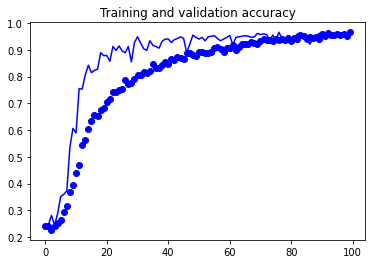

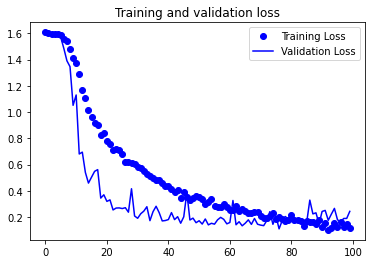

In [ ]:
## Visualising the Accuracy and loss plots

callback_csv = pd.read_csv('./training.csv')
acc = callback_csv['accuracy']
val_acc = callback_csv['val_accuracy']
loss = callback_csv['loss']
val_loss = callback_csv['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

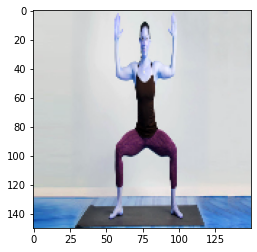

In [ ]:
image = cv2.imread('../input/yoga-poses-dataset/DATASET/TEST/goddess/00000001.jpg')

image = cv2.resize(image,(150,150))

image = np.array(image)

plt.imshow(image)

In [ ]:
## Testing with an example

image = cv2.imread('../input/yoga-poses-dataset/DATASET/TEST/goddess/00000001.jpg')

image = cv2.resize(image,(150,150))

image = np.array(image)

image = image.reshape(1,150,150,3)

image.shape



(1, 150, 150, 3)

In [ ]:
# Converting the one hot encoded output to display the output class

dict  = {1: 'Downdog', 2: 'Goddess', 3: 'Plank',4: 'Tree',5: 'Warrior2'}

def out_conversion(out_array):
    for i in range(5):
        if out_array[i] == 1.:
            return dict[i+1]
        

In [ ]:
model = tf.keras.models.load_model('./model.h5')
out_arr = model.predict(image)[0]
print(f'Predicted class is : {out_conversion(out_arr)}')

Predicted class is : Goddess
